In [137]:
import requests
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import folium
from folium import IFrame
from folium.plugins import MarkerCluster
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [138]:
# base api url
# url = 'https://touchpass.com/ams/rest/v1/reporting/faretx/'

# This does not produce the right format
# start = datetime.datetime(2020, 8, 3, 12, 0, 0).strftime('%Y-%m-%d %H:%M:%SZ')
# end = datetime.datetime(2020, 8, 30, 12, 0, 0).strftime('%Y-%m-%d %H:%M:%SZ')



# This does produce the right format but how do I get to pick the dates???
# startdate = datetime.datetime.utcnow().isoformat() + 'Z'
# enddate = datetime.datetime.utcnow().isoformat() + 'Z'



# UTC_OFFSET_TIMEDELTA = datetime.datetime.utcnow() - datetime.datetime.now()
# start_local_datetime = datetime.datetime.strptime("2020-08-03 05:00:00", "%Y-%m-%d %H:%M:%S")
# start_result_utc_datetime = start_local_datetime + UTC_OFFSET_TIMEDELTA
# start_result_utc_datetime = start_result_utc_datetime.strftime("%Y-%m-%d %H:%M:%S")

# end_local_datetime = datetime.datetime.strptime("2020-10-05 22:00:00", "%Y-%m-%d %H:%M:%S")
# end_result_utc_datetime = end_local_datetime + UTC_OFFSET_TIMEDELTA
# end_result_utc_datetime = end_result_utc_datetime.strftime("%Y-%m-%d %H:%M:%S")



# parameters for api
headers = {
    'accept': 'application/json',
    'Api-Token': 'h1Qp72M6DIYb5xyavD1kmWYgOI8wS',
    'Agency-ID': '9K7A4H9JHRVQ'
}

# # Call API and save to a varialbe
# response = requests.get(url + startdate + '/' + enddate, headers=headers)

response = requests.get('https://touchpass.com/ams/rest/v1/reporting/faretx/2020-08-01T09%3A00%3A00Z/2020-08-31T03%3A00%3A00Z', headers=headers).json()

In [139]:
df = pd.DataFrame(response)

In [140]:
df.head()

,txId,ts,type,mediaUsed,mediaType,cardNumber,fareType,accountId,routeName,latitude,longitude,reader,vehicle,readerPosition,fare,passUsed,stopName,stopId
0,5200000000008006,2020-08-01T10:18:56.303Z,MONTHLY_CAP_REACHED,HOUSE,HOUSE_CARD,8030593679841404,Employee,2615052.0,DEFAULT,36.093327,-79.959265,H2R270,TransLoc Vehicle: 1707 (4016277),0,0,NaN,NaN,NaN
1,4990000000000828,2020-08-01T10:19:30.859Z,MONTHLY_CAP_REACHED,HOUSE,HOUSE_CARD,8090706684817725,Employee,2916960.0,DEFAULT,0.000000,0.000000,H2R252,TransLoc Vehicle: 1700 (4016263),0,0,NaN,NaN,NaN
2,4990000000000830,2020-08-01T10:50:25.143Z,STORED_VALUE,BARCODE_NOGPS,MOBILE_MEDIA,7069108641261551,Full Fare,2981944.0,3,0.000000,0.000000,H2R252,TransLoc Vehicle: 1700 (4016263),0,250,NaN,NaN,NaN
3,4990000000000831,2020-08-01T10:51:28.953Z,STORED_VALUE,HOUSE,HOUSE_CARD,8095232105806259,Half Priced,2918405.0,3,0.000000,0.000000,H2R252,TransLoc Vehicle: 1700 (4016263),0,125,NaN,NaN,NaN
4,4990000000000832,2020-08-01T10:54:54.273Z,TRIP_PASS,BARCODE_PAPER,PRINTED_TOKEN,9056702361759264,Full Fare,2991361.0,3,0.000000,0.000000,H2R252,TransLoc Vehicle: 1700 (4016263),0,0,Free One Way PT,NaN,NaN


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9154 entries, 0 to 9153
Data columns (total 18 columns):
txId              9154 non-null int64
ts                9154 non-null object
type              9154 non-null object
mediaUsed         9154 non-null object
mediaType         9152 non-null object
cardNumber        9152 non-null object
fareType          9154 non-null object
accountId         9152 non-null float64
routeName         9154 non-null object
latitude          9154 non-null float64
longitude         9154 non-null float64
reader            9154 non-null object
vehicle           9152 non-null object
readerPosition    9154 non-null int64
fare              9154 non-null int64
passUsed          3559 non-null object
stopName          6951 non-null object
stopId            6951 non-null object
dtypes: float64(3), int64(3), object(12)
memory usage: 1.3+ MB


In [142]:
# Convert ts to a datetime object
df['ts'] =  pd.to_datetime(df['ts'])

# Create new Date field and convert ts from UTC to local time
df['Date'] = df['ts'].dt.tz_convert('US/Eastern')

# Create day of week attribute
df['Day_of_Week'] = df['ts'].dt.day_name()

# Create new variables for date and time
df['just_date'] = df['Date'].dt.date
df['time'] = df['Date'].dt.strftime('%H:%M')

# Convert fields to categories to save memory and increase performance
df['type'] = df['type'].astype('category')
df['mediaUsed'] = df['mediaUsed'].astype('category')
df['mediaType'] = df['mediaType'].astype('category')
df['routeName'] = df['routeName'].astype('category')

df = df.drop(columns=['accountId', 'reader', 'vehicle', 'readerPosition',
                      'fare', 'mediaType', 'txId', 'mediaUsed'], axis=1)

df.sample(5)

,ts,type,cardNumber,fareType,routeName,latitude,longitude,passUsed,stopName,stopId,Date,Day_of_Week,just_date,time
587,2020-08-04 10:38:49.083000+00:00,CALENDAR_PASS,8004301233630780,Full Fare,4,36.074553,-79.270269,UNC XPass 2019-20,Mebane Cone Health Park-and-Ride,1958,2020-08-04 06:38:49.083000-04:00,Tuesday,2020-08-04,06:38
5439,2020-08-19 11:18:24.250000+00:00,TIME_PASS,8000744589364765,Half Priced,17,36.118166,-80.071755,XPass 31 Day,Kernersville Town Hall Park & Ride,261,2020-08-19 07:18:24.250000-04:00,Wednesday,2020-08-19,07:18
1828,2020-08-07 10:46:06.781000+00:00,STORED_VALUE,8013790096527571,Full Fare,1,36.099246,-80.245093,NaN,Winston-Salem Transportation Center (L-1),198,2020-08-07 06:46:06.781000-04:00,Friday,2020-08-07,06:46
5638,2020-08-19 20:19:54.061000+00:00,CALENDAR_PASS,7050634832109920,Full Fare,4,0.000000,0.000000,UNC XPass 2019-20,NaN,NaN,2020-08-19 16:19:54.061000-04:00,Wednesday,2020-08-19,16:19
7656,2020-08-25 20:44:07.737000+00:00,MONTHLY_CAP_REACHED,8037247464970174,Employee,1,36.099314,-80.245107,NaN,Winston-Salem Transportation Center (L-1),198,2020-08-25 16:44:07.737000-04:00,Tuesday,2020-08-25,16:44


We still need to perform some data cleaning.

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9154 entries, 0 to 9153
Data columns (total 14 columns):
ts             9154 non-null datetime64[ns, UTC]
type           9154 non-null category
cardNumber     9152 non-null object
fareType       9154 non-null object
routeName      9154 non-null category
latitude       9154 non-null float64
longitude      9154 non-null float64
passUsed       3559 non-null object
stopName       6951 non-null object
stopId         6951 non-null object
Date           9154 non-null datetime64[ns, US/Eastern]
Day_of_Week    9154 non-null object
just_date      9154 non-null object
time           9154 non-null object
dtypes: category(2), datetime64[ns, US/Eastern](1), datetime64[ns, UTC](1), float64(2), object(8)
memory usage: 877.3+ KB


In [144]:
# generate variables
n = len(df) # length of dataframe
null_cardNumber = df['cardNumber'].isnull().sum() # number of nulls for cardNumber
null_stopName = df['stopName'].isnull().sum() # number of nulls for stopName
null_stopId = df['stopId'].isnull().sum() # number of nulls for stopId
null_passUsed = df['passUsed'].isnull().sum() # number of nulls for passUsed

print('There are {:,} null values for cardNumber representing {}% of the dataset'.format(null_cardNumber, round(null_cardNumber/n,4)*100))
print('There are {:,} null values for stopName representing {}% of the dataset'.format(null_stopName, round(null_stopName/n,4)*100))
print('There are {:,} null values for stopId representing {}% of the dataset'.format(null_stopId, round(null_stopId/n,4)*100))
print('There are {:,} null values for passUsed representing {}% of the dataset'.format(null_passUsed, round(null_passUsed/n,4)*100))

There are 2 null values for cardNumber representing 0.02% of the dataset
There are 2,203 null values for stopName representing 24.07% of the dataset
There are 2,203 null values for stopId representing 24.07% of the dataset
There are 5,595 null values for passUsed representing 61.12% of the dataset


We will drop the two rows where `cardNumber` is null and replace the null values with 'unknown' in `stopName`, `stopID` and `passUsed`.

In [145]:
# drop null from cardNumber
df.dropna(subset=['cardNumber'], inplace=True)

# replace missing values with 'unknown'
df['stopName'].fillna('unknown', inplace=True)
df['stopId'].fillna('unknown', inplace=True)
df['passUsed'].fillna('unknown', inplace=True)

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9152 entries, 0 to 9153
Data columns (total 14 columns):
ts             9152 non-null datetime64[ns, UTC]
type           9152 non-null category
cardNumber     9152 non-null object
fareType       9152 non-null object
routeName      9152 non-null category
latitude       9152 non-null float64
longitude      9152 non-null float64
passUsed       9152 non-null object
stopName       9152 non-null object
stopId         9152 non-null object
Date           9152 non-null datetime64[ns, US/Eastern]
Day_of_Week    9152 non-null object
just_date      9152 non-null object
time           9152 non-null object
dtypes: category(2), datetime64[ns, US/Eastern](1), datetime64[ns, UTC](1), float64(2), object(8)
memory usage: 948.5+ KB


In [147]:
# Create geometry column for plotting
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
crs = {'init':'epsg:3857'}

gdf = gpd.GeoDataFrame(df, crs=crs, geometry=geometry)

C:\Users\miguelf.PARTNC\AppData\Local\ESRI\conda\envs\geo_analysis\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


Let's check the head of the new geodataframe object to ensure the geometry column looks right.

In [148]:
gdf.head()

,ts,type,cardNumber,fareType,routeName,latitude,longitude,passUsed,stopName,stopId,Date,Day_of_Week,just_date,time,geometry
0,2020-08-01 10:18:56.303000+00:00,MONTHLY_CAP_REACHED,8030593679841404,Employee,DEFAULT,36.093327,-79.959265,unknown,unknown,unknown,2020-08-01 06:18:56.303000-04:00,Saturday,2020-08-01,06:18,POINT (-79.95927 36.09333)
1,2020-08-01 10:19:30.859000+00:00,MONTHLY_CAP_REACHED,8090706684817725,Employee,DEFAULT,0.000000,0.000000,unknown,unknown,unknown,2020-08-01 06:19:30.859000-04:00,Saturday,2020-08-01,06:19,POINT (0.00000 0.00000)
2,2020-08-01 10:50:25.143000+00:00,STORED_VALUE,7069108641261551,Full Fare,3,0.000000,0.000000,unknown,unknown,unknown,2020-08-01 06:50:25.143000-04:00,Saturday,2020-08-01,06:50,POINT (0.00000 0.00000)
3,2020-08-01 10:51:28.953000+00:00,STORED_VALUE,8095232105806259,Half Priced,3,0.000000,0.000000,unknown,unknown,unknown,2020-08-01 06:51:28.953000-04:00,Saturday,2020-08-01,06:51,POINT (0.00000 0.00000)
4,2020-08-01 10:54:54.273000+00:00,TRIP_PASS,9056702361759264,Full Fare,3,0.000000,0.000000,Free One Way PT,unknown,unknown,2020-08-01 06:54:54.273000-04:00,Saturday,2020-08-01,06:54,POINT (0.00000 0.00000)


The data has been cleaned and a few new attributes have been created. Let's look at some visualizations.

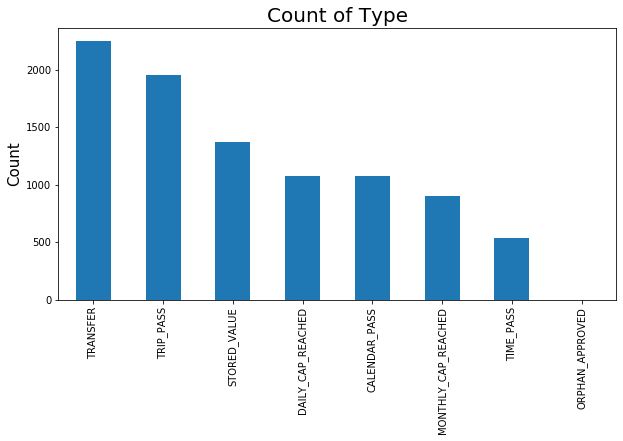

In [149]:
fig_dims = (10,5)
fig, ax = plt.subplots(figsize=fig_dims)

typeplot = gdf['type'].value_counts().plot(kind='bar')
typeplot.set_title("Count of Type", fontsize=20)
typeplot.set_ylabel("Count", fontsize=15)
plt.show()

In [150]:
# calcualte number of days in dataset
num_of_days = len(gdf['just_date'].unique())
# calculate number of transfers
num_of_transfers = len(gdf[gdf['type'] == 'TRANSFER'])

print('There are {:,} days in the dataset with {:,} transfers recorded in the TouchPass system.'.format(num_of_days, num_of_transfers))
print('Meaning there are on average, {:,} transfers per day.'.format(round(num_of_transfers/num_of_days,2)))

There are 25 days in the dataset with 2,248 transfers recorded in the TouchPass system.
Meaning there are on average, 89.92 transfers per day.


In [151]:
num_of_taps = len(gdf)
percent_transfers = round(num_of_transfers/num_of_taps*100,2)

print('Transfers account of {}% of the dataset.'.format(percent_transfers))

Transfers account of 24.56% of the dataset.


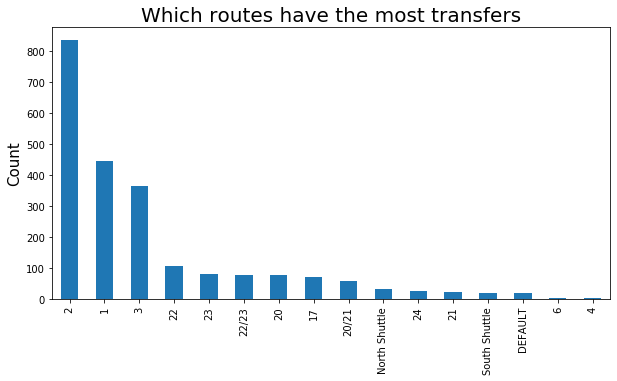

In [152]:
# grab all transactions that are transfers
transfers_df = gdf[gdf['type'] == 'TRANSFER']

# create plot to show which routes have the most transfers
fig_dims = (10,5)
fig, ax = plt.subplots(figsize=fig_dims)

faretype = transfers_df['routeName'].value_counts().plot(kind='bar')

faretype.set_title("Which routes have the most transfers", fontsize=20)
faretype.set_ylabel("Count", fontsize=15)
plt.show()

We can see that Route 2 has the most transfers followed by Routes 1 and 3. The shuttles and other routes have significantly lower numbers of transfers.

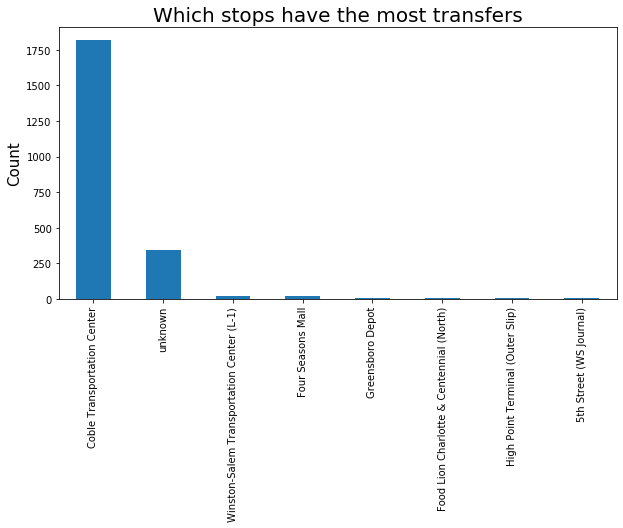

In [153]:
# create plot to show which stops have the most transfers
fig_dims = (10,5)
fig, ax = plt.subplots(figsize=fig_dims)

# filter dataset for stops with 5 or more transfers
transfer_stops = transfers_df[transfers_df['stopName'].map(transfers_df['stopName'].value_counts()) >= 5]

# create plot for stops with 5 or more transfers
transfer_stop_plot = transfer_stops['stopName'].value_counts().plot(kind='bar')

transfer_stop_plot.set_title("Which stops have the most transfers", fontsize=20)
transfer_stop_plot.set_ylabel("Count", fontsize=15)
plt.show()

There are a number of transfers with an unknown stop. It's also curious that there are transfers at some of the known stops. We'll use Four Seasons Mall as an example. Let's dig into these a little further. We'll start with the unknown stops first.

In [154]:
# Grab records where the stopName is unknown and the latitude is not equal to 0
unknown_transfer_loc = transfer_stops[(transfer_stops['stopName'] == 'unknown') & (transfer_stops['latitude'] != 0)]

In [183]:
# define function for creating map
def add_point_clusters(mapobj, gdf, popup_field_list):
    #Create empty lists to contain the point coordinates and the point pop-up information
    coords, popups = [], [] 
    #Loop through each record in the GeoDataFrame
    for i, row in gdf.iterrows():
        #Append lat and long coordinates to "coords" list
        coords.append([row.geometry.y, row.geometry.x])
        #Create a string of HTML code used in the IFrame popup
        #Join together the fields in "popup_field_list" with a linebreak between them
        label = '<br>'.join([row[field] for field in popup_field_list])
        #Append an IFrame that uses the HTML string to the "popups" list 
        popups.append(IFrame(label, width = 300, height = 100))
        
    #Create a Folium feature group for this layer, since we will be displaying multiple layers
    pt_lyr = folium.FeatureGroup(name = 'pt_lyr')
    
    #Add the clustered points of crime locations and popups to this layer
    pt_lyr.add_child(MarkerCluster(locations = coords, popups = popups))
    
    #Add this point layer to the map object
    mapobj.add_child(pt_lyr)
    return mapobj

In [184]:
m = folium.Map(location=[36.038675, -79.891975], zoom_start=12)

#Update choropleth with point clusters
m = add_point_clusters(m, unknown_transfer_loc, ['routeName','stopName','Day_of_Week','time'])
m

The map above shows locations of TouchPass transactions that were transfers but the stop name was unknown. If we zoom in the the marker in downtown Greensboro, we can see that it's location matches the stop Washington and Eugene St. The map is interactive so feel free to zoom in and out and pan around. I am still working on getting the popups to function properly.

In [156]:
four_seasons_trnsfr = transfers_df[transfers_df['stopName'] == 'Four Seasons Mall']

print('There are {} transfers at Four Seasons Mall in the dataset.'.format(len(four_seasons_trnsfr)))

There are 18 transfers at Four Seasons Mall in the dataset.


In [157]:
# grab the unique card numbers for those passengers who transfered at Four Seasons
four_seasons_trnsfr_card = four_seasons_trnsfr['cardNumber'].unique()

# filter entire dataset for those card numbers
four_season_trnsfr_df = gdf[gdf['cardNumber'].isin(four_seasons_trnsfr_card)]

In [178]:
m1 = folium.Map(location=[36.049338, -79.860774], zoom_start=14)

#Update choropleth with point clusters
m1 = add_point_clusters(m1, four_seasons_trnsfr, ['routeName','stopName','Day_of_Week','time'])
m1

In [159]:
gdf.head()

,ts,type,cardNumber,fareType,routeName,latitude,longitude,passUsed,stopName,stopId,Date,Day_of_Week,just_date,time,geometry
0,2020-08-01 10:18:56.303000+00:00,MONTHLY_CAP_REACHED,8030593679841404,Employee,DEFAULT,36.093327,-79.959265,unknown,unknown,unknown,2020-08-01 06:18:56.303000-04:00,Saturday,2020-08-01,06:18,POINT (-79.95927 36.09333)
1,2020-08-01 10:19:30.859000+00:00,MONTHLY_CAP_REACHED,8090706684817725,Employee,DEFAULT,0.000000,0.000000,unknown,unknown,unknown,2020-08-01 06:19:30.859000-04:00,Saturday,2020-08-01,06:19,POINT (0.00000 0.00000)
2,2020-08-01 10:50:25.143000+00:00,STORED_VALUE,7069108641261551,Full Fare,3,0.000000,0.000000,unknown,unknown,unknown,2020-08-01 06:50:25.143000-04:00,Saturday,2020-08-01,06:50,POINT (0.00000 0.00000)
3,2020-08-01 10:51:28.953000+00:00,STORED_VALUE,8095232105806259,Half Priced,3,0.000000,0.000000,unknown,unknown,unknown,2020-08-01 06:51:28.953000-04:00,Saturday,2020-08-01,06:51,POINT (0.00000 0.00000)
4,2020-08-01 10:54:54.273000+00:00,TRIP_PASS,9056702361759264,Full Fare,3,0.000000,0.000000,Free One Way PT,unknown,unknown,2020-08-01 06:54:54.273000-04:00,Saturday,2020-08-01,06:54,POINT (0.00000 0.00000)


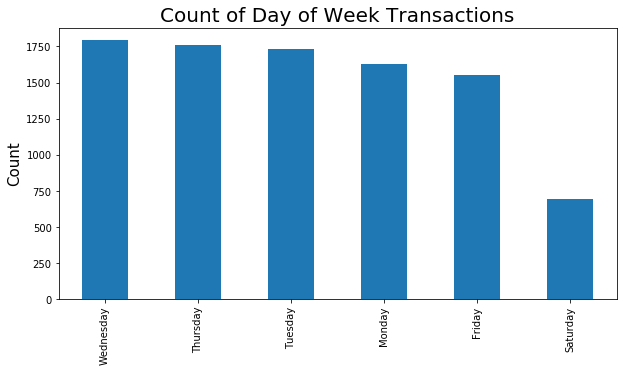

In [160]:
fig_dims = (10,5)
fig, ax = plt.subplots(figsize=fig_dims)

faretype = gdf['Day_of_Week'].value_counts().plot(kind='bar')

faretype.set_title("Count of Day of Week Transactions", fontsize=20)
faretype.set_ylabel("Count", fontsize=15)
plt.show()

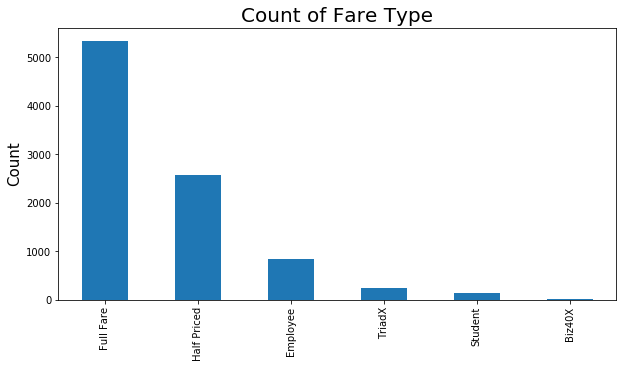

In [161]:
fig_dims = (10,5)
fig, ax = plt.subplots(figsize=fig_dims)

faretype = gdf['fareType'].value_counts().plot(kind='bar')

faretype.set_title("Count of Fare Type", fontsize=20)
faretype.set_ylabel("Count", fontsize=15)
plt.show()

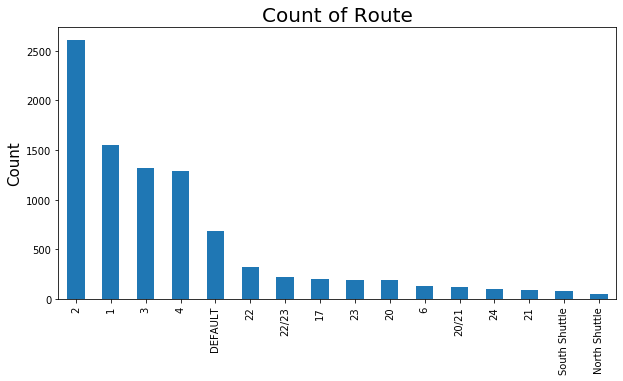

In [162]:
fig_dims = (10,5)
fig, ax = plt.subplots(figsize=fig_dims)

faretype = gdf['routeName'].value_counts().plot(kind='bar')

faretype.set_title("Count of Route", fontsize=20)
faretype.set_ylabel("Count", fontsize=15)
plt.show()